### ADTA 5560-Build, Train, and Test a Simple RNN on Sine Wave Data

In [1]:
# Import python libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# import the sequential model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN

2023-12-06 06:55:34.103411: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-06 06:55:34.264168: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-12-06 06:55:34.264219: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-12-06 06:55:35.186310: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [3]:
# Import keras-timeseries generator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Import keras-MinMaxScalar
from sklearn.preprocessing import MinMaxScaler

### Generate  Sine Data

In [4]:
# Generate an array(x) of 2048 datapoints evenly spaced in range of 0 to 72
# Then calculate the sinwave for each value of x.

x = np.linspace(0,72,2048)
y = np.sin(x)

In [5]:
# print x value 
x

array([0.00000000e+00, 3.51734245e-02, 7.03468490e-02, ...,
       7.19296532e+01, 7.19648266e+01, 7.20000000e+01])

In [6]:
# print y value
y

array([0.        , 0.03516617, 0.07028884, ..., 0.3211825 , 0.28768087,
       0.25382336])

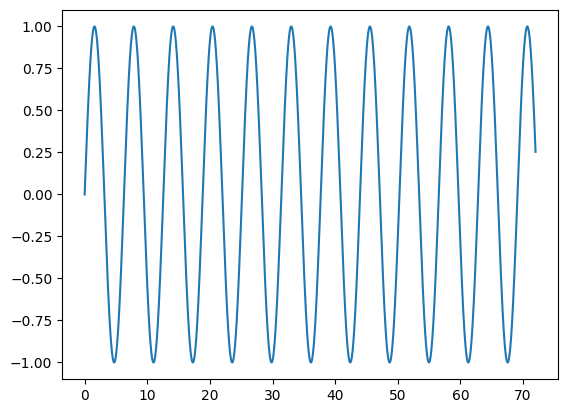

In [7]:
#Plot the graph from x and y values
plt.plot(x,y)

### Load data

In [8]:
# Load the data into a pandas dataframe

df = pd.DataFrame(data=y, index=x, columns=['Sine'])

In [9]:
# This dataset has only one attribute(Sine)

df.head(5)

,Sine
0.000000,0.000000
0.035173,0.035166
0.070347,0.070289
0.105520,0.105325
0.140694,0.140230


In [10]:
# Using the len function calclated the total datapoints of the dataframe object
len(df)

2048

In [11]:
# Print the last 5 datapoints from the dataset

df.tail(5)

,Sine
71.859306,0.386953
71.894480,0.354287
71.929653,0.321183
71.964827,0.287681
72.000000,0.253823


### Split dataset into Test and Train

In [12]:
# set percentage of data used for testing. 
# Here we added 20% data for the testing

test_percentage = 0.2

In [13]:
# Find out number of data points for testing the model

len(df)*test_percentage

409.6

In [14]:
# To store the length of test model data points

test_length = np.round(len(df)*test_percentage)

In [15]:
test_length

410.0

In [16]:
# calculate the testing dataset index point

test_start_index = int(len(df)-test_length)

In [17]:
test_start_index

1638

In [18]:
# create separate dataset for training and testing from dataframe

#Training dataset
data_train = df.iloc[:test_start_index]

#Testing dataset
data_test = df.iloc[test_start_index:]

In [19]:
# Print first 5 values of train dataset

data_train.head(5)

,Sine
0.000000,0.000000
0.035173,0.035166
0.070347,0.070289
0.105520,0.105325
0.140694,0.140230


In [20]:
# Print first 5 values of test dataset

data_test.head(5)

,Sine
57.614069,0.874983
57.649243,0.891468
57.684416,0.906850
57.719590,0.921110
57.754763,0.934230


### Data Normalization

In [21]:
# Using MinMaxScalar to normalize the data in a scale [0,1]
# Create scaler instance

scaler = MinMaxScaler()

# Train scalar to perform normalization
scaler.fit(data_train)

MinMaxScaler()

In [22]:
# normalizing the training dataset
normalized_train = scaler.transform(data_train)

# normalizing the testing dataset
normalized_test = scaler.transform(data_test)

### Creating Timeseries Generator Instance

In [23]:
#set the input sequence length of size 50 to predict future one
length = 50

# batch_size is the number of timeseries in each batch
batch_size = 1

#create TimeseriesGenrator for training datatset
train_tsGenerator50 = TimeseriesGenerator(normalized_train, normalized_train, length = length, batch_size = batch_size)

In [24]:
#To view first batch of Timeseries Generator
x,y = train_tsGenerator50[0]

In [25]:
x.flatten()

array([0.50000072, 0.51758384, 0.53514521, 0.5526631 , 0.57011584,
       0.58748186, 0.60473965, 0.62186787, 0.63884535, 0.65565106,
       0.67226423, 0.6886643 , 0.70483099, 0.72074429, 0.73638453,
       0.75173234, 0.76676876, 0.78147517, 0.79583338, 0.80982564,
       0.82343463, 0.83664352, 0.84943597, 0.86179615, 0.87370878,
       0.88515911, 0.89613299, 0.90661684, 0.91659768, 0.92606317,
       0.93500161, 0.94340193, 0.95125375, 0.95854735, 0.9652737 ,
       0.9714245 , 0.97699212, 0.98196969, 0.98635103, 0.99013075,
       0.99330415, 0.99586731, 0.99781707, 0.999151  , 0.99986747,
       0.99996558, 0.99944521, 0.99830701, 0.99655238, 0.9941835 ])

In [26]:
#print predicted target y for input x

y

array([[0.99120329]])

### Build simple RNN model

In [27]:
#feature size to train model
n_features = 1

#define model
model = Sequential()

#adding simple RNN layer
model.add(SimpleRNN(80, input_shape=(length, n_features)))

#add a FC(fully-connected) Layer for final prediction
model.add(Dense(1))

2023-12-06 06:55:36.717547: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-12-06 06:55:36.717590: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-12-06 06:55:36.717621: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (deep-learning-vm-tf2): /proc/driver/nvidia/version does not exist
2023-12-06 06:55:36.717887: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Compile model

In [28]:
# To compare the model with loss funtion:mean square error and optimizer:adam

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 80)                6560      
                                                                 
 dense (Dense)               (None, 1)                 81        
                                                                 
Total params: 6,641
Trainable params: 6,641
Non-trainable params: 0
_________________________________________________________________


### Train/Fit Model

In [29]:
# use the fit generaator

model.fit_generator(train_tsGenerator50,epochs=5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/5
1588/1588 [==============================] - 11s 6ms/step - loss: 0.0011
Epoch 2/5
1588/1588 [==============================] - 10s 6ms/step - loss: 1.0101e-04
Epoch 3/5
1588/1588 [==============================] - 10s 6ms/step - loss: 3.2032e-04
Epoch 4/5
1588/1588 [==============================] - 10s 6ms/step - loss: 1.5546e-05
Epoch 5/5
1588/1588 [==============================] - 10s 6ms/step - loss: 4.2818e-05


### Visualize Model's performance after training

<AxesSubplot:>

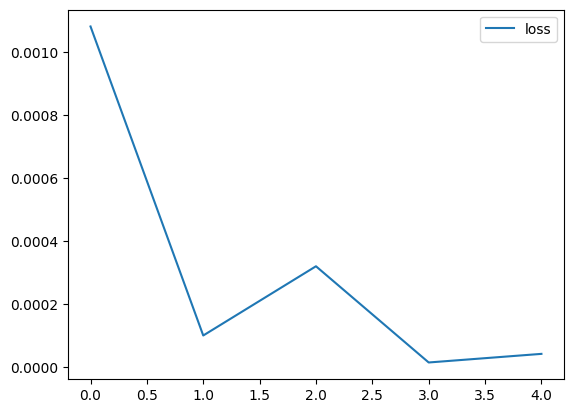

In [30]:
# Load the loss data into dataframe
df_model_loss = pd.DataFrame(model.history.history)

# Visualize the loss data
df_model_loss.plot()

### Evaluate model on Test Data

In [31]:
length

50

In [32]:
# evaluate the first batch of data
first_eval_batch = normalized_train[-length : ]
first_eval_batch

array([[0.18047242],
       [0.19419429],
       [0.20829447],
       [0.22275549],
       [0.23755948],
       [0.25268812],
       [0.2681227 ],
       [0.28384412],
       [0.29983294],
       [0.31606937],
       [0.33253333],
       [0.34920446],
       [0.36606212],
       [0.38308548],
       [0.40025346],
       [0.41754484],
       [0.43493821],
       [0.45241208],
       [0.46994481],
       [0.48751472],
       [0.50510008],
       [0.52267913],
       [0.54023012],
       [0.55773135],
       [0.57516117],
       [0.592498  ],
       [0.60972042],
       [0.62680711],
       [0.64373693],
       [0.66048894],
       [0.67704243],
       [0.6933769 ],
       [0.70947216],
       [0.7253083 ],
       [0.74086572],
       [0.75612518],
       [0.77106781],
       [0.78567511],
       [0.79992902],
       [0.81381191],
       [0.8273066 ],
       [0.8403964 ],
       [0.85306511],
       [0.86529707],
       [0.87707714],
       [0.88839075],
       [0.89922391],
       [0.909

In [33]:
# Reshape the batch
first_eval_batch = first_eval_batch.reshape((1, length, n_features))
first_eval_batch

array([[[0.18047242],
        [0.19419429],
        [0.20829447],
        [0.22275549],
        [0.23755948],
        [0.25268812],
        [0.2681227 ],
        [0.28384412],
        [0.29983294],
        [0.31606937],
        [0.33253333],
        [0.34920446],
        [0.36606212],
        [0.38308548],
        [0.40025346],
        [0.41754484],
        [0.43493821],
        [0.45241208],
        [0.46994481],
        [0.48751472],
        [0.50510008],
        [0.52267913],
        [0.54023012],
        [0.55773135],
        [0.57516117],
        [0.592498  ],
        [0.60972042],
        [0.62680711],
        [0.64373693],
        [0.66048894],
        [0.67704243],
        [0.6933769 ],
        [0.70947216],
        [0.7253083 ],
        [0.74086572],
        [0.75612518],
        [0.77106781],
        [0.78567511],
        [0.79992902],
        [0.81381191],
        [0.8273066 ],
        [0.8403964 ],
        [0.85306511],
        [0.86529707],
        [0.87707714],
        [0

### Evaluate Model

In [34]:
# declare list for prediction
test_predictions = []


first_eval_batch = normalized_train[-length: ]

# Reshape the batch into 3D array
current_batch = first_eval_batch.reshape((1,length,n_features))

# Iteration for remaining batch prediction
for i in range(len(data_test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 22ms/step


In [35]:
#Converting scaler results back to real values
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[ 0.88434118],
       [ 0.90699269],
       [ 0.93260798],
       [ 0.95813672],
       [ 0.9833529 ],
       [ 1.00643404],
       [ 1.02844766],
       [ 1.04860043],
       [ 1.0673215 ],
       [ 1.08446329],
       [ 1.09975972],
       [ 1.11383045],
       [ 1.12629328],
       [ 1.13739999],
       [ 1.14693171],
       [ 1.15411954],
       [ 1.16001157],
       [ 1.1642876 ],
       [ 1.16700485],
       [ 1.16828515],
       [ 1.16841604],
       [ 1.16723135],
       [ 1.16491726],
       [ 1.16146067],
       [ 1.15688853],
       [ 1.15121513],
       [ 1.14456374],
       [ 1.13674577],
       [ 1.12830458],
       [ 1.11874711],
       [ 1.10874666],
       [ 1.09769455],
       [ 1.0861923 ],
       [ 1.07366748],
       [ 1.06067226],
       [ 1.04687715],
       [ 1.03255704],
       [ 1.01758653],
       [ 1.00211653],
       [ 0.98605346],
       [ 0.96949246],
       [ 0.95248502],
       [ 0.93495711],
       [ 0.9169482 ],
       [ 0.89846459],
       [ 0

In [36]:
data_test

,Sine
57.614069,0.874983
57.649243,0.891468
57.684416,0.906850
57.719590,0.921110
57.754763,0.934230
...,...
71.859306,0.386953
71.894480,0.354287
71.929653,0.321183
71.964827,0.287681


In [37]:
# Inserting the prediction label to datatset
data_test['Predictions'] = true_predictions

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
data_test

,Sine,Predictions
57.614069,0.874983,0.884341
57.649243,0.891468,0.906993
57.684416,0.906850,0.932608
57.719590,0.921110,0.958137
57.754763,0.934230,0.983353
...,...,...
71.859306,0.386953,1.869705
71.894480,0.354287,1.860548
71.929653,0.321183,1.850072
71.964827,0.287681,1.838349


<AxesSubplot:>

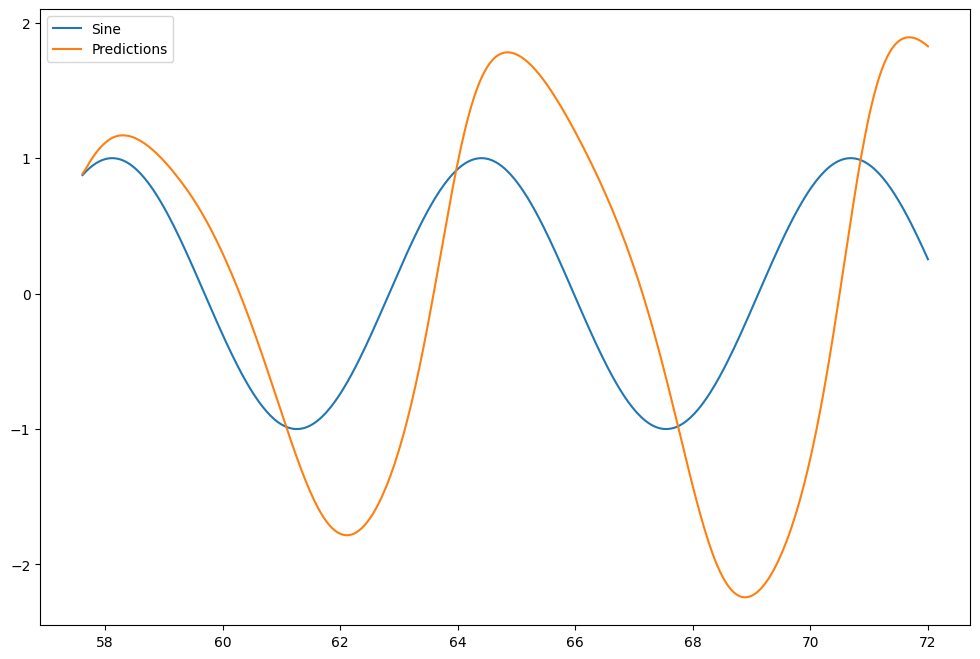

In [39]:
#plot the graph

data_test.plot(figsize=(12,8))